<a href="https://colab.research.google.com/github/BallinCs/IAyRN_2025/blob/main/Actividades/AF7_RNP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Cargar Librerías

In [1]:
# Actividad 7: Redes Neuronales Artificiales
# Equipo:
# N4 Cesar Ballin Rodriguez-2132117
# N4 Brandon Daniel Zavala Gaytan 2055952
# N4 Dylan Jesús Cuéllar Aranda 2042806
# N4 Letizia Isabel García Vargas 2056273
# N5 Erick Escárcega Esparza 2132268
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score

2. Cargar Datos

In [2]:
keras.datasets.mnist.load_data(path="mnist.npz")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

3. Preprocesamiento de datos

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

4. Selección y entrenamiento del modelo

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax') # Agregar la capa Densa de salida con 10 unidades (para 10 clases) y activación softmax
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam', # Adam optimizer is a good default choice
              loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy for integer labels
              metrics=['accuracy'])

trained = model.fit(x_train, y_train, epochs=10) # Train for a few epochs

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8957 - loss: 0.3611
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9735 - loss: 0.0846
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9821 - loss: 0.0556
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9876 - loss: 0.0381
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9909 - loss: 0.0287
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9913 - loss: 0.0263
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9933 - loss: 0.0205
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9946 - loss: 0.0161
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9954 - loss: 0.0142
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9957 - loss: 0.0129


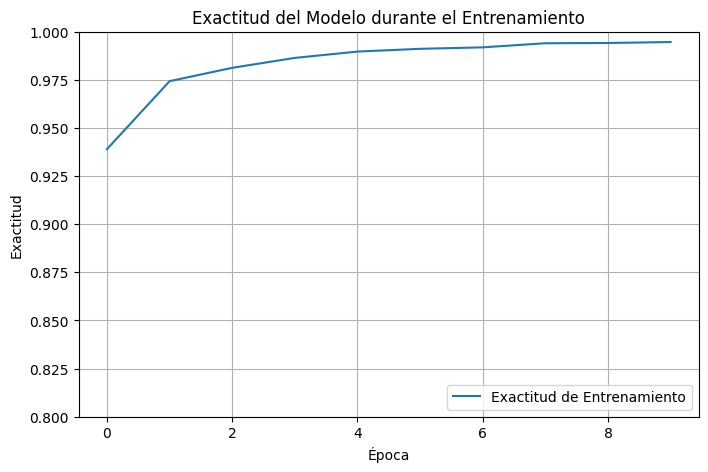

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(trained.history['accuracy'], label='Exactitud de Entrenamiento')
plt.title('Exactitud del Modelo durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Exactitud')
plt.ylim([0.8, 1]) # Ajusta el rango del eje Y si es necesario para mejor visualización
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

5. Prueba del modelo

In [8]:
loss, accuracy = model.evaluate(x_test, y_test)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9801 - loss: 0.0984
Test Loss: 0.08403220772743225
Test Accuracy: 0.9828000068664551


In [9]:
sample_images = x_test[:5]
sample_true_labels = y_test[:5]

predictions = model.predict(sample_images)

predicted_classes = np.argmax(predictions, axis=1)

for i in range(5):
    print(f"Predicción para imagen {i+1}: {predicted_classes[i]}, Valor Real: {sample_true_labels[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicción para imagen 1: 7, Valor Real: 7
Predicción para imagen 2: 2, Valor Real: 2
Predicción para imagen 3: 1, Valor Real: 1
Predicción para imagen 4: 0, Valor Real: 0
Predicción para imagen 5: 4, Valor Real: 4


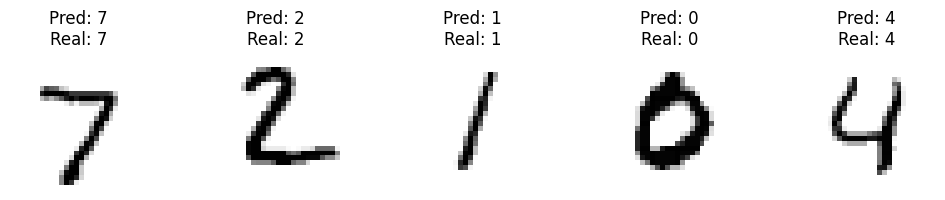

In [10]:
plt.figure(figsize=(10, 2))
for i in range(5):
     plt.subplot(1, 5, i + 1)
     plt.imshow(sample_images[i].reshape(28, 28), cmap=plt.cm.binary)
     plt.title(f"Pred: {predicted_classes[i]}\nReal: {sample_true_labels[i]}")
     plt.axis('off')
plt.tight_layout()
plt.show()